# LR-Assignments
## 1. Consider the Boston Housing Price Dataset.

In [1]:
# Loading the dataset
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataframe= pd.read_csv("C:\\7\\Batch7\\ML-Assignments\\Linear_Reg\\boston_house_price.csv")
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Find the correlation of features using heatmap
   ### In filter method ,we filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matric and it is most commonly done using Pearson Correlation.
   ### Here we will first plot the Pearson correlation heatmap and see correlation os independent variable with the output variable MEDV. We will only select features which has correlation of above 0.5 with the output variable.
   ### The correlation coeffircient has values between -1 to 1
   ### ---- A value closer to 0 implies weaker correlation(exact 0 implies no correaltion)
   ### ---- A value closer to 1 implies stronger positive correlation
   ### ---- A value closer to -1 implies stronger negative correlation

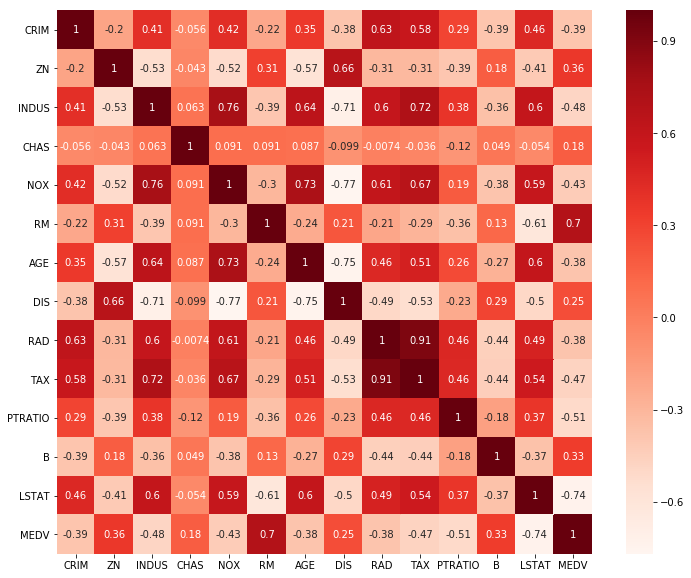

In [2]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor= dataframe.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()

In [3]:
#Correlation with output variable
cor_tar= abs(cor["MEDV"])

#Selecting highly correalted features
rel_features= cor_tar[cor_tar>0.5]
rel_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

## 3. Perform hypothesis testing

### Lets understand the features of the dataset first
 #### CRIM- This is the per capita crime rate by town
 #### ZN   -   This is the proportion of residential land zoned for lots larger than 25,000 sq ft.
 #### INDUS- This is the proportuion of non-reatil business acres per town.
 #### CHAS: This is the charles river dummny variable( 1 if tract bounds river, 0 otherwise)
 #### NOX:      This is the nitir oxcides concentration(pp10m)
 #### RM:        This is the average numner of roomms per dwelling
 #### AGE :    This is the proportion of owner-occupied units built prior to 1940
 #### DIS:      This is the weighted distances to five boston employment centers
 #### RAD:  This is the index of accessibilty to radial highways
 #### TAX:   This is the full-values propery tax rate per 10000 dollers
 #### PTRATIO: This is the pupil-teacher rationby town
 #### B:        This calculated as 1000(Bk-0.63)sq, wehre Bk is the proportion of people of African American descent by town
 #### LSTAT: This is the percentage lower status of the population
 #### MEDV: This is the median values of owner-occupied homes in 1000s dollers
 

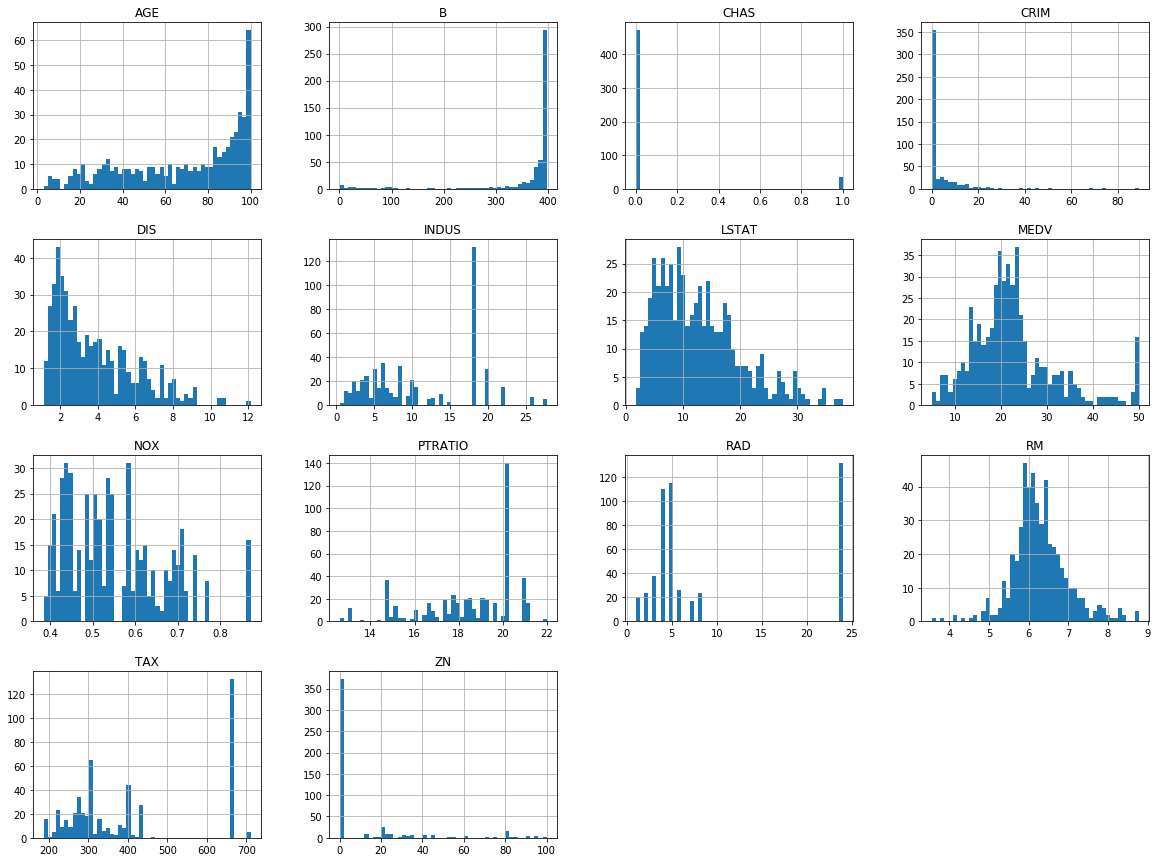

In [6]:
# You can see with correation and heat map that 3 featurs RM,PTRATIO and LSTAT are impacting the target and highly correalted.
dataframe.hist(bins=50,figsize=(20,15))
plt.show()

### We can spot a linear relationship between ‘RM’ and House prices ‘MEDV’. In addition, we can infer from the histogram that the ‘MEDV’ variable seems to be normally distributed but contain several outliers.

In [5]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest,pval1 = stests.ztest(dataframe['MEDV'], x2=dataframe['CHAS'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


# Linear Regression using statsmodel


In [10]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataframe,test_size=0.2,random_state=42)


In [20]:
X= train_set[["RM","PTRATIO","LSTAT"]]
y= train_set["MEDV"]
model = sm.OLS(y,X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2760.
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          2.84e-267
Time:                        18:09:21   Log-Likelihood:                -1246.5
No. Observations:                 404   AIC:                             2499.
Df Residuals:                     401   BIC:                             2511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             6.3127      0.244     25.900      0.000       5.834       6.792
PTRATIO       -0.5948      0.100     -5.932      0.000      -0.792      -0.398
LSTAT         -0.5003      0.044    -11.434      0.000      -0.586      -0.414
==============================================================================
Omnibus:                      154.624   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.911
Skew:                           1.526   Prob(JB):                    5.73e-194
Kurtosis:                       9.600   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
predictions_test_set= test_set[["RM","PTRATIO","LSTAT"]]
predictions_test=  model.predict(predictions_test_set)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2760.
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          2.84e-267
Time:                        18:13:22   Log-Likelihood:                -1246.5
No. Observations:                 404   AIC:                             2499.
Df Residuals:                     401   BIC:                             2511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             6.3127      0.244     25.900      0.000       5.834       6.792
PTRATIO       -0.5948      0.100     -5.932      0.000      -0.792      -0.398
LSTAT         -0.5003      0.044    -11.434      0.000      -0.586      -0.414
==============================================================================
Omnibus:                      154.624   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.911
Skew:                           1.526   Prob(JB):                    5.73e-194
Kurtosis:                       9.600   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using sklearn



In [36]:
from sklearn import linear_model
X = pd.DataFrame(nd.c_[dataframe['LSTAT'], dataframe['RM'],dataframe['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = dataframe['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model= LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from sklearn.metrics import r2_score
y_train_predict= lin_model.predict(X_train)
rmse = (nd.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2= r2_score(Y_train,y_train_predict)
print("Model Performance")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

Model Performance
RMSE is 5.30386319330793
R2 score is 0.6725214335656512




# Model Performance on Test set

In [42]:
y_test_predict= lin_model.predict(X_test)
rmse_test = (nd.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2_test= r2_score(Y_test,y_test_predict)
print("Model Performance on Test Set")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))
print('\n')

Model Performance on Test Set
RMSE is 4.913937534764082
R2 score is 0.6915878280744172




# Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

## In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

In [59]:
from sklearn.linear_model import Ridge
X_ri = pd.DataFrame(nd.c_[dataframe['LSTAT'], dataframe['RM'],dataframe['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y_ri = dataframe['MEDV']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ri, Y_ri, test_size = 0.2, random_state=5)
rr = Ridge(alpha= 0.05, normalize=True ) # try with alpha = 0.01 # higher alpha value ,more restriction on the coefficiencs; low alpha values more generalization
rr.fit(X_train,Y_train)
predict_train= rr.predict(X_train)
rmse = (nd.sqrt(mean_squared_error(Y_train,predict_train)))
r2= r2_score(Y_train,predict_train)
print("Model Performance Ridge Train")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')


Model Performance Ridge Train
RMSE is 5.308375796092398
R2 score is 0.6719639495977008




In [61]:
y_test_predict_ridge= rr.predict(X_test)
rmse_test = (nd.sqrt(mean_squared_error(Y_test,y_test_predict_ridge)))
r2_test= r2_score(Y_test,y_test_predict_ridge)
print(" Ridge Model Performance on Test Set")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))
print('\n')

 Ridge Model Performance on Test Set
RMSE is 4.854811695724767
R2 score is 0.6989649765558443






# Lasso Regression
## LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge

In [83]:
from sklearn.linear_model import Lasso
X_lasso = pd.DataFrame(nd.c_[dataframe['LSTAT'], dataframe['RM'],dataframe['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y_lasso = dataframe['MEDV']
lasso = Lasso(alpha=1,max_iter=10e5)
X_train,X_test,Y_train,Y_test = train_test_split(X_lasso,Y_lasso,test_size=0.2, random_state=42)
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)
test_score=lasso.score(X_test,Y_test)
coeff_used = nd.sum(lasso.coef_!=0)

print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6536163052757881
test score:  0.6425986380092988
number of features used:  3
